In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import CQNet

In [2]:
nums_photo = 5

In [3]:
# 1. 加载训练好的模型
def load_trained_model(model_path):
    # 直接加载 TorchScript 模型
    model = torch.jit.load(model_path)
    model.eval()  # 切换到评估模式
    return model


# 2. 预处理新数据
def preprocess_new_data(new_sonar_data):
    # 对新数据进行预处理，确保形状和输入的训练数据一致
    new_data = np.moveaxis(new_sonar_data, -1, 0)  # 调整轴顺序
    new_data = np.expand_dims(new_data, axis=1)  # 扩展通道维度
    new_data = (new_data - np.min(new_data)) / (np.max(new_data) - np.min(new_data))  # 归一化
    new_data_tensor = torch.tensor(new_data, dtype=torch.float32)
    return new_data_tensor


# 3. 使用模型进行推断
def detect_anomalies(model, data_tensor):
    with torch.no_grad():  # 禁用梯度计算以加快推断速度
        predictions = model(data_tensor)
    return predictions


# 4. 可视化原始数据与异常点
def plot_anomalies(original_data, predictions, slice_idx):
    original_img = original_data[slice_idx, 0, :, :].cpu().numpy()  # 获取原始数据
    prediction_mask = predictions[slice_idx, 0, :, :].cpu().numpy()  # 获取模型预测的异常点

    plt.figure(figsize=(10, 5))

    # 显示原始图像
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f"Original Image (Slice {slice_idx})")
    plt.colorbar()

    # 显示预测的异常点
    plt.subplot(1, 2, 2)
    plt.imshow(original_img, cmap='gray')  # 灰度图作为背景
    plt.imshow(prediction_mask, cmap='Reds', alpha=0.5)  # 红色的异常点叠加显示
    plt.title(f"Predicted Anomalies (Slice {slice_idx})")
    plt.colorbar()

    plt.show()


# 5. 综合步骤：加载模型、处理新数据、进行预测并可视化
def run_anomaly_detection(model_path, new_sonar_data):
    # 加载训练好的模型
    model = load_trained_model(model_path)

    # 预处理新数据
    data_tensor = preprocess_new_data(new_sonar_data)

    # 使用模型进行推断，检测异常点
    predictions = detect_anomalies(model, data_tensor)

    # 可视化异常点
    for slice_idx in range(data_tensor.shape[0]):
        plot_anomalies(data_tensor, predictions, slice_idx)

In [4]:
# 假设有新的声呐数据（替换为实际的数据文件路径）
new_file_path = "./data/HEU0812_20240202_133556.dat"

# 读取并处理声呐数据

img_8bit_matrix = CQNet.read_sonar_data(new_file_path, nums_photo)
new_sonar_data = CQNet.reshape_img_matrix(img_8bit_matrix, nums_photo)  # 重新调整数据形状

# 模型文件路径
trained_model_path = './model/SuperDeep_scripted.pt'

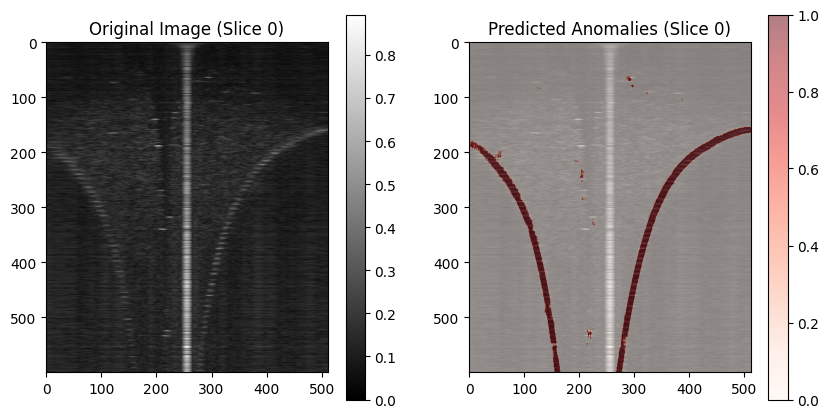

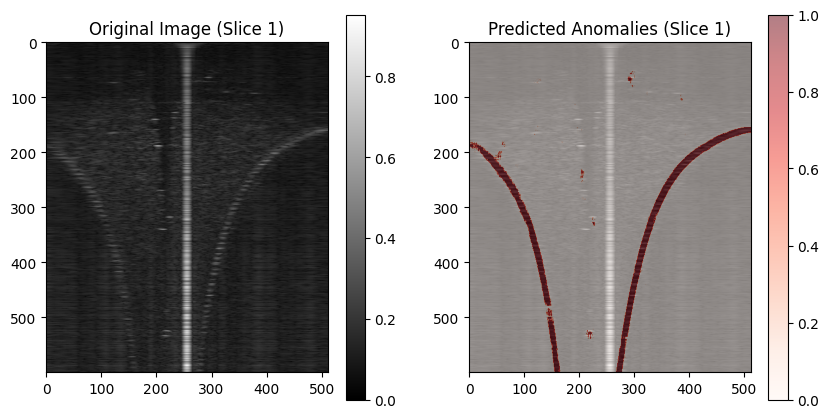

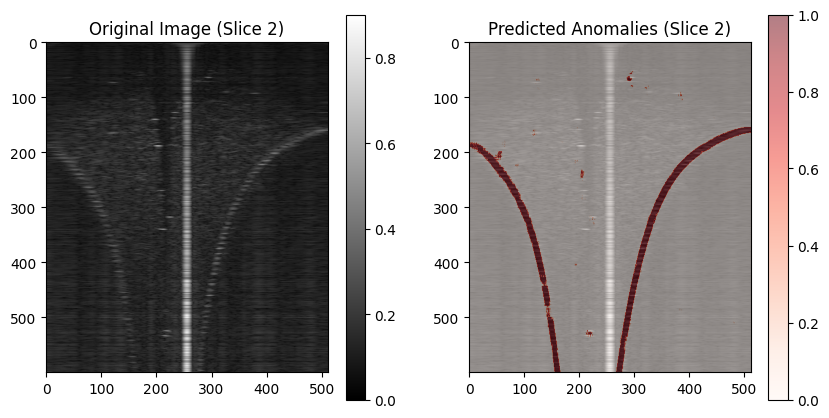

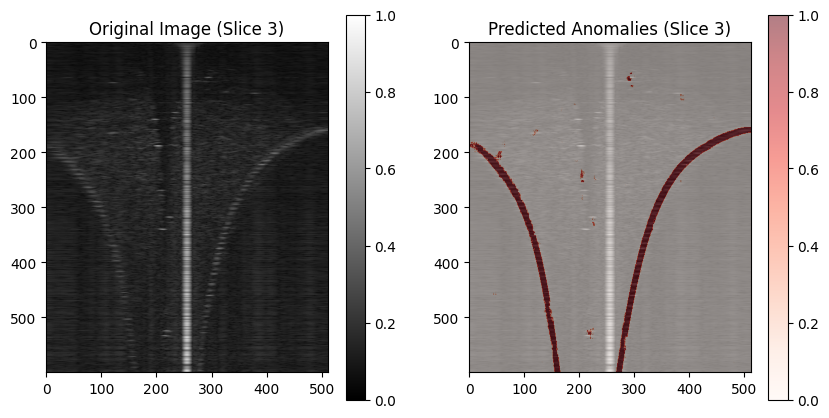

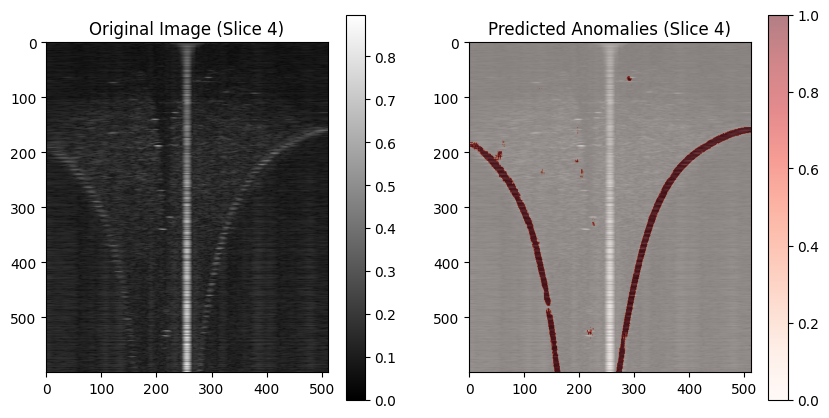

In [5]:
# 运行异常点检测
run_anomaly_detection(trained_model_path, new_sonar_data)

In [4]:
model = load_trained_model('./model/SuperDeep.pth')  # 加载预训练模型
model = torch.jit.script(model)                      # 转换为 TorchScript 模型
model.save('./model/SuperDeep_scripted.pt')          # 保存完整的 TorchScript 模型

C:\Users\86138\AppData\Local\Temp\ipykernel_5936\3463012755.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=to